# Covid Data Analysis

A further exploration into data from CovidDeaths.csv and CovidVaccinations.csv. 

Data was sourced from OurWorldInData.org and was initially queried into smaller sub datasets in SQL to look at features more in depth.

## 1.   Exploring the Human Development Index in relation to Covid Death Rate

The first dataset is the percent of Covid Deaths out of a country's population (total deaths from covid/population) in comparison with the country's Human Development Index. 

This data was aggregated in SQL from dates ranging from January 2020 - April 2021.

The Human Development Index is defined by the United Nations as a marker of a country's quality of life, health and education for its population (United Nations).

In [106]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import plotly.express as px
import seaborn as sns

hdis = pd.read_csv('Location-VS-HDI.csv')

hdis.head(177)

,location,percent_deaths,development_index
0,Norway,0.013945,0.957
1,Ireland,0.099295,0.955
2,Switzerland,0.122848,0.955
3,Hong Kong,NaN,0.949
4,Iceland,0.008498,0.949
...,...,...,...
172,Liberia,0.001681,0.480
173,Guinea-Bissau,0.003404,0.480
174,Democratic Republic of Congo,0.000855,0.480
175,Guinea,0.001096,0.477


In [61]:
# interactive plot using plotly to view stats for each country

fig = px.scatter(hdis, x='development_index', y='percent_deaths', hover_data=['location'], title='HDI Vs Covid Death %')
fig.show()

Text(0.5, 1.0, 'HDI vs Covid Death %')

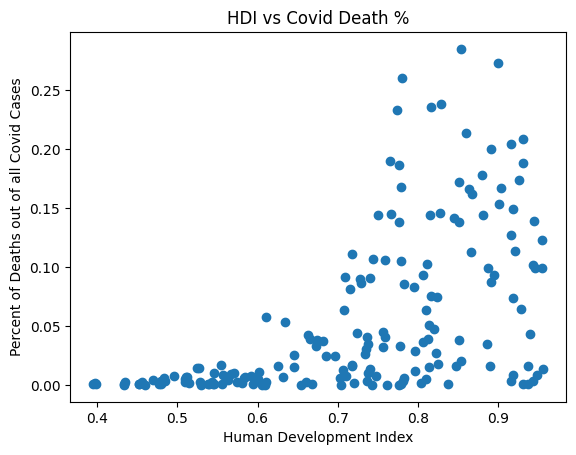

In [60]:
plt.scatter(hdis['development_index'], hdis['percent_deaths'])

plt.xlabel('Human Development Index')
plt.ylabel('Percent of Deaths out of all Covid Cases')
plt.title('HDI vs Covid Death %')

In [62]:
corr_coeff = hdis['development_index'].corr((hdis['percent_deaths']))
corr_coeff

0.550924100333604

### Analyzing the Initial Scatter

Based on the plots and the correlation coefficient of 0.55, HDI and Death Percentage seem to have a slight positive linear relationship.
Next, a logarithmic transformation of the Death % is used to further linearize the data.

Text(0.5, 1.0, 'HDI vs Log Covid Death %')

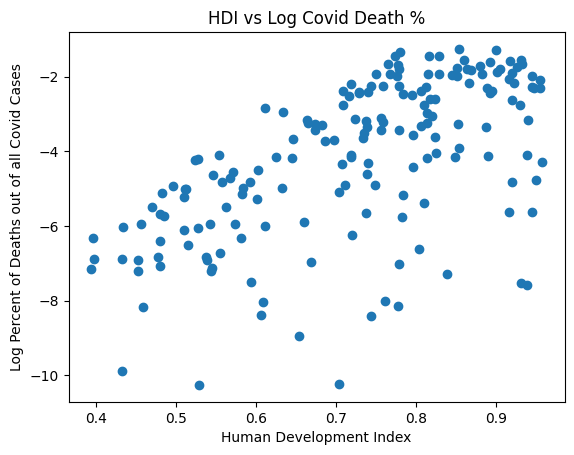

In [59]:
# using a log transformation to linearize the data 

plt.scatter(hdis['development_index'], np.log(hdis['percent_deaths']))

plt.xlabel('Human Development Index')
plt.ylabel('Log Percent of Deaths out of all Covid Cases')
plt.title('HDI vs Log Covid Death %')

In [63]:
corr_coeff = hdis['development_index'].corr(np.log(hdis['percent_deaths']))
corr_coeff

0.603144028133324

### The Correlation Coefficient
Linearizing the data reveals a stronger underlying relationship. 

The Correlation Coefficient between Human Development Index and Log Percent of Covid Deaths is approximately 0.6, indicating a moderate positive correlation between these attributes for a location.

This indicates that as Human Development Index increases for a country/location, the percent of Covid deaths per total cases also tends to increase.

## 2. Exploring Other Factors in Relation to Covid Death Rate

### Initial Hypothesis
The fact that countries with a higher HDI tend to have a higher death rate could be due to multiple reasons, such that more developed countries tend to have higher rates of cardiovascular disease, and higher proportions of older individuals than developing nations. 

Data containing these statistics and others is stored in Country-Statistics-CovidData.csv and was queried from the CovidDeaths.csv dataset in Postgre.

In [65]:
countries = pd.read_csv('Country-Statistics-CovidData.csv')
countries.head(10)

,location,cdr,65_Older,70_Older,diabetes,female_smokers,male_smokers
0,Uzbekistan,724.417,4.469,2.873,7.57,1.3,24.7
1,Afghanistan,597.029,2.581,1.337,9.59,NaN,NaN
2,Papua New Guinea,561.494,3.808,2.142,17.65,23.5,48.8
3,Azerbaijan,559.812,6.018,3.871,7.11,0.3,42.5
4,Marshall Islands,557.793,NaN,NaN,30.53,NaN,NaN
5,Vanuatu,546.300,4.394,2.620,12.02,2.8,34.5
6,Ukraine,539.849,16.462,11.133,7.11,13.5,47.4
7,Egypt,525.432,5.159,2.891,17.31,0.2,50.1
8,Georgia,496.218,14.864,10.244,7.11,5.3,55.5
9,Yemen,495.003,2.922,1.583,5.35,7.6,29.2


### Merging the Tables
Both tables are aggregated by location, so location serves as a primary key to merge them on.

In [66]:
countries_merged = pd.merge(countries, hdis, on='location')
countries_merged.head(10) 

,location,cdr,65_Older,70_Older,diabetes,female_smokers,male_smokers,percent_deaths,development_index
0,Uzbekistan,724.417,4.469,2.873,7.57,1.3,24.7,0.001939,0.720
1,Afghanistan,597.029,2.581,1.337,9.59,NaN,NaN,0.006743,0.511
2,Papua New Guinea,561.494,3.808,2.142,17.65,23.5,48.8,0.001196,0.555
3,Azerbaijan,559.812,6.018,3.871,7.11,0.3,42.5,0.044550,0.756
4,Marshall Islands,557.793,NaN,NaN,30.53,NaN,NaN,NaN,0.704
5,Vanuatu,546.300,4.394,2.620,12.02,2.8,34.5,0.000326,0.609
6,Ukraine,539.849,16.462,11.133,7.11,13.5,47.4,0.105006,0.779
7,Egypt,525.432,5.159,2.891,17.31,0.2,50.1,0.013035,0.707
8,Georgia,496.218,14.864,10.244,7.11,5.3,55.5,0.103029,0.812
9,Yemen,495.003,2.922,1.583,5.35,7.6,29.2,0.004111,0.470


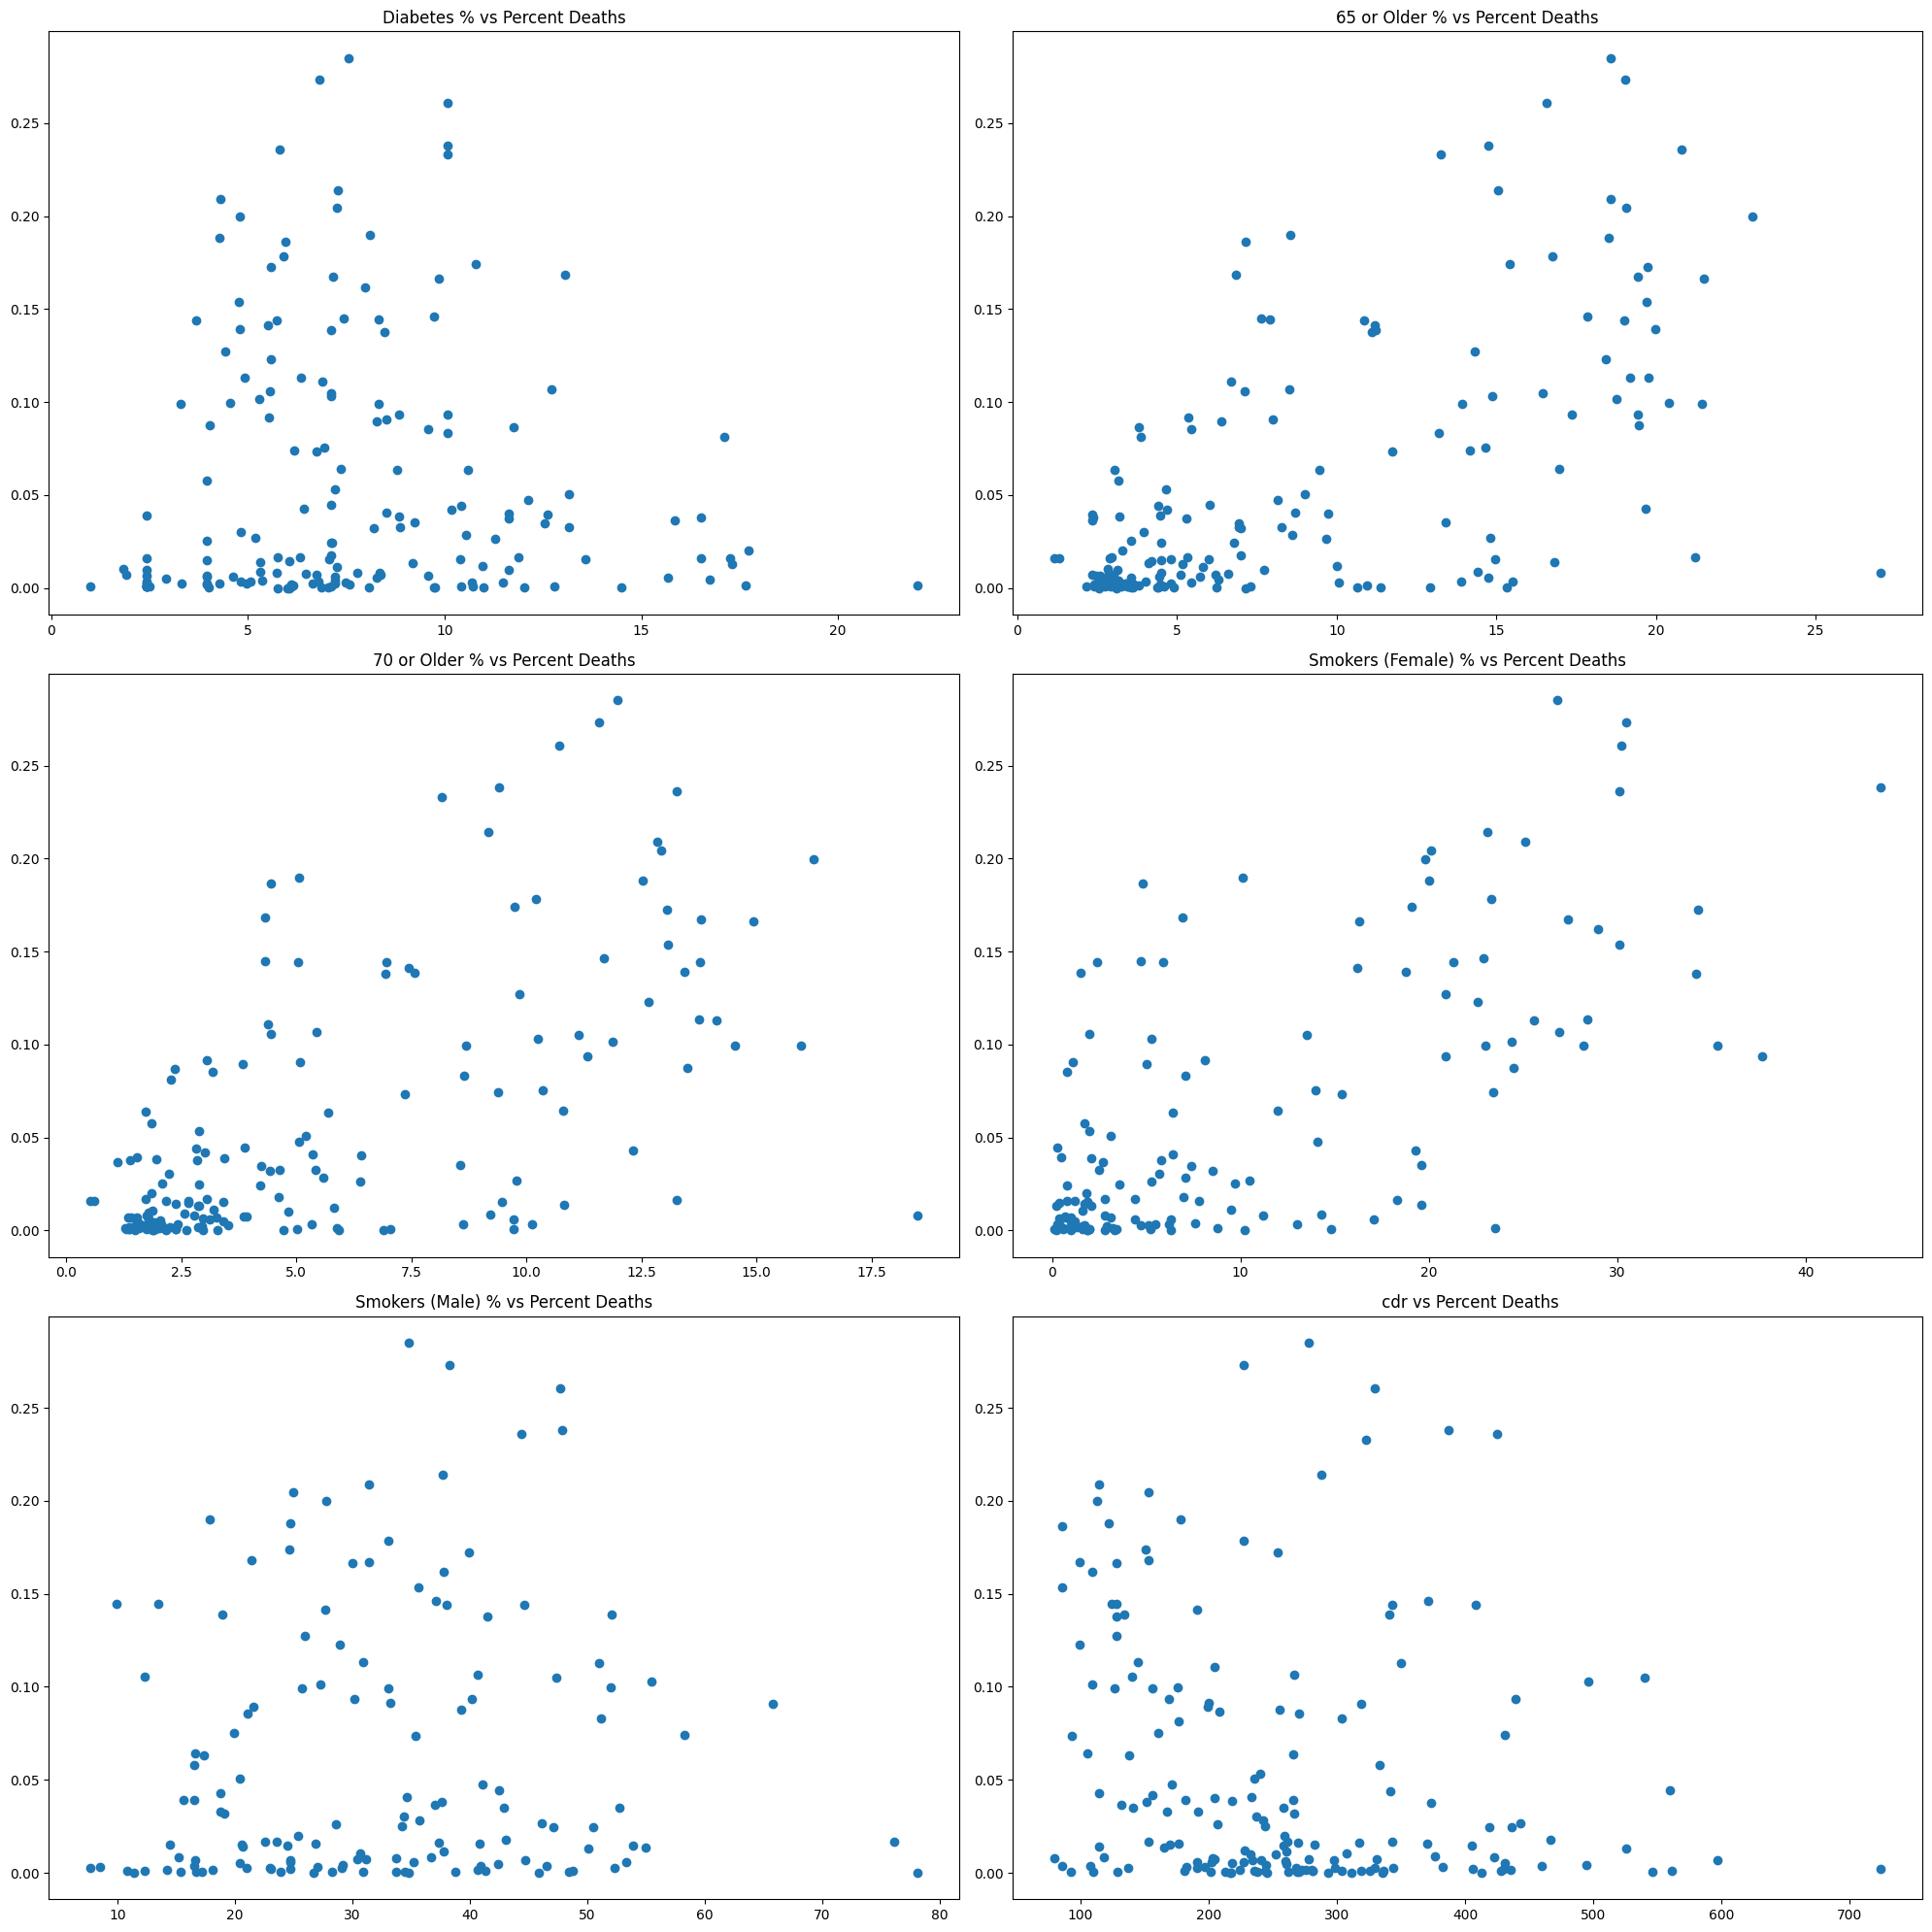

In [97]:
## Comparing stats with Covid Death Rates via scatterplots

fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (20,20))

axes = axes.flatten() 

axes[0].scatter(countries_merged['diabetes'], countries_merged['percent_deaths'])
axes[0].set_title("Diabetes % vs Percent Deaths")
axes[1].scatter(countries_merged['65_Older'], countries_merged['percent_deaths'])
axes[1].set_title("65 or Older % vs Percent Deaths")
axes[2].scatter(countries_merged['70_Older'], countries_merged['percent_deaths'])
axes[2].set_title("70 or Older % vs Percent Deaths")
axes[3].scatter(countries_merged['female_smokers'], countries_merged['percent_deaths'])
axes[3].set_title("Smokers (Female) % vs Percent Deaths")
axes[4].scatter(countries_merged['male_smokers'], countries_merged['percent_deaths'])
axes[4].set_title("Smokers (Male) % vs Percent Deaths")
axes[5].scatter(countries_merged['cdr'], countries_merged['percent_deaths'])
axes[5].set_title(" cdr vs Percent Deaths")

plt.tight_layout()
plt.show()

<AxesSubplot:>

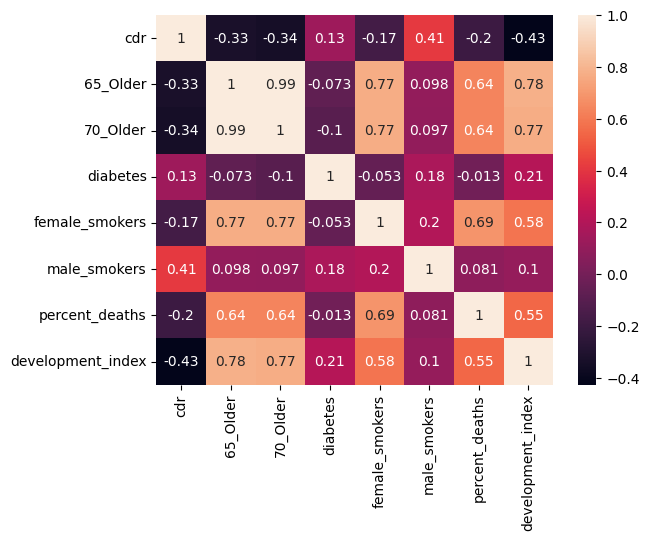

In [105]:
## heatmap to see correlation coefficients for every statistic in relation to Covid Death Percentage

cols = [col for col in countries_merged.columns if countries_merged[col].dtype == float]

correlations = countries_merged[cols].corr()

sns.heatmap(correlations, annot = True) 

### Analyzing the Heatmap and Scatterplots
The heatmap indicates that there is a moderate positive correlation between the percent of Covid deaths for a country and the percent of individuals aged 65 or older and the percent of those aged 70 or older, as the Correlation Coefficient for these two relationships is 0.64.

This makes sense because of the well-recorded mortality rates Covid-19 has for elderly individuals.

In [112]:
# interactive plot using plotly to view percentages for each country

fig = px.scatter(countries_merged, x='65_Older', y='percent_deaths', hover_data=['location'], title='Persons Aged 65+ % Vs Covid Death %')
fig.show()

In [113]:
fig = px.scatter(countries_merged, x='development_index', y='65_Older', hover_data=['location'], title='HDI Vs Persons aged 65+ %')
fig.show()

# Discussion of Results

Initially, the positive linear relationship between Human Development Index and Covid Death Rate is confusing. Human Development is a quantitative measure of a country's quality of life, educational achievement, and health. Based on this information, it would make sense for the correlation between HDI and Covid Death Rate to be negative. 

Based on the analysis, it is reasonable to assume that the fact that countries with higher HDIs also tend to have a high proportion of eldery in their populations is a likely cause for their higher Covid Death Rates.

### Limitations

This Dataset does not include Covid Death Rates for specific age groups, so further analysis cannot be done to support these findings.

### Possible Follow-Up Analyses

Ideas for possible follow-up analyses include:

1. Case Study into specific populations, specifically those which appear to outly the rest of the datapoints
        i.e. Japan has a high Human Development Index, the highest percent of individuals aged 65 or older, and a very low Covid Death Rate.

2. Supplemental Datasets to support findings
    
3. Updated dataset on Covid Death Rate to conduct time series analysis

### Data Sources

OurWorldInData.org/CovidDeaths
OurWorldInData.org/CovidVaccinations

Data from Jan. 2020 - April 2021